# Introduction to Linear Regression

Linear Regression assumes that the relationship between 2 variables, x and y can be modeled by a straight line

$y = \beta_0 + \beta_1x$

We can also see the equation written as : ** y = mx +b**

with $\beta_0$ and $\beta_1$ represents 2 model parameters 

$x$ is usually called $x$ the **predictor** and $y$  the **response**

In [2]:
import pandas as pd
import numpy as np

In [6]:
import seaborn as sns

In [8]:
df = pd.read_csv('../Dataset/Iris.csv',index_col=0)
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


Using the famous Iris dataset to showcase an example of a linear regression plot. This plot shows the relationship between flower petal length and their petal width.

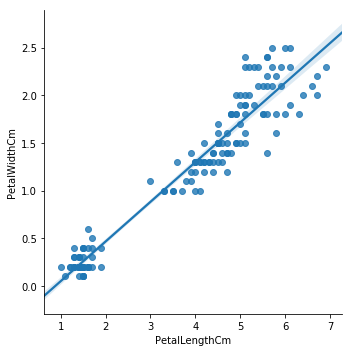

In [7]:
sns.lmplot(x="PetalLengthCm",y="PetalWidthCm",data=df)

We can witness that the data align following a straight line 